In [7]:
# Aykırı değer analiz kodu
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Veri setinin yüklenmesi
df = pd.read_csv("maindataset.csv")

# Aykırı değer analizinde kullanılacak sütunların belirlenmesi
numerik_stnlar = ['Height', 'Weight']

# Aykırı değer değer analizini yapan fonksiyonun tanımlanması
def IQR_ileAykiriDegerHesaplama(veri, stn):
    Q1 = veri[stn].quantile(0.25)
    Q3 = veri[stn].quantile(0.75)
    IQR = Q3 - Q1
    if (stn == 'Height'):
        katsayi = 6
    else:
        katsayi = 1

    alt_sinir = Q1 -katsayi * IQR
    ust_sinir = Q3 + katsayi * IQR
    print(katsayi)
    print(veri[stn].mean())
    print(veri[stn].quantile(0.5))
    print(veri[stn].quantile(0.75))
    return veri[(veri[stn] < alt_sinir) | (veri[stn] > ust_sinir)]

# Belirlenen aykırı değerlerin verisetinden atılması
aykiri_degerler = pd.DataFrame()
for stnlar in numerik_stnlar:
    aykiri_degerler = pd.concat([aykiri_degerler, IQR_ileAykiriDegerHesaplama(df, stnlar)])

# Aykırı değerlerin olduğu verisetinden birbirinin kopyası olan satırların atılması
aykiri_degerler = aykiri_degerler.drop_duplicates()

# IQR ile analiz edilmiş verisetinden kopya olan sütunların atılması
temizlenmis_veriseti = df.drop(aykiri_degerler.index)

# Verisetlerinin .csv dosyası olarak kaydedilmesi
aykiri_degerler.to_csv("AykiriDegerler.csv", index=False)
temizlenmis_veriseti.to_csv("TemizlenmisData1.csv", index=False)


6
1.7016773533870204
1.700499
1.768464
1
86.58605812648035
83.0
107.430682


Class: Normal_Weight
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.882775  0.585366    0.428571  0.494845
Lojistik Regresyon  0.880383  0.687500    0.196429  0.305556
Karar Ağaçları      0.966507  0.903846    0.839286  0.870370
Random Forest       0.956938  0.839286    0.839286  0.839286
SVM                 0.894737  0.676471    0.410714  0.511111
Naive Bayes         0.880383  0.588235    0.357143  0.444444


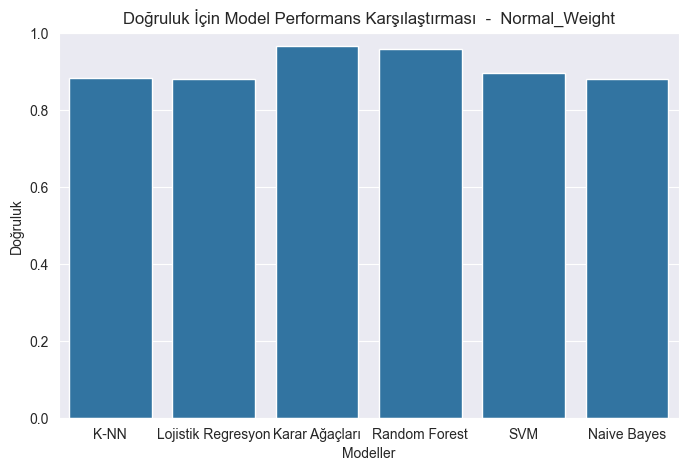

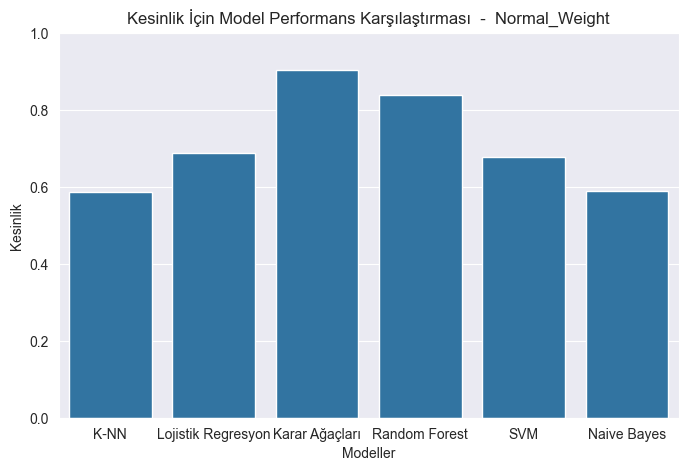

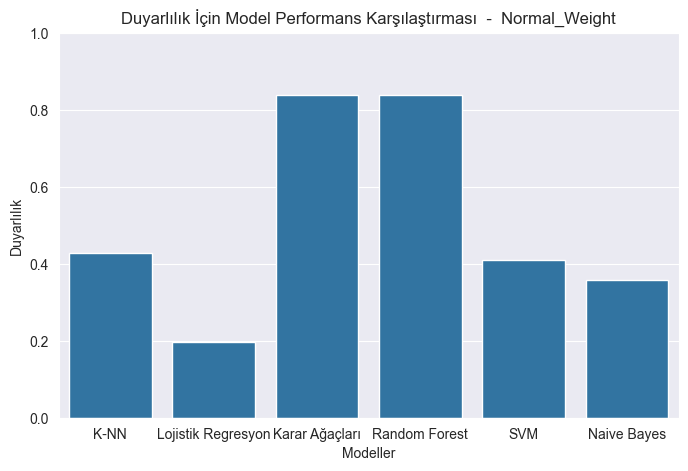

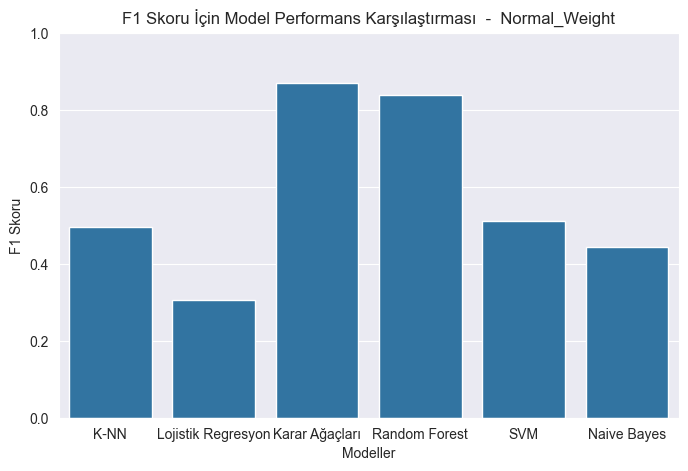

Class: Overweight_Level_I
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.925837  0.790698    0.607143  0.686869
Lojistik Regresyon  0.858852  0.421053    0.142857  0.213333
Karar Ağaçları      0.954545  0.862745    0.785714  0.822430
Random Forest       0.956938  0.975000    0.696429  0.812500
SVM                 0.901914  0.894737    0.303571  0.453333
Naive Bayes         0.234450  0.145161    0.964286  0.252336


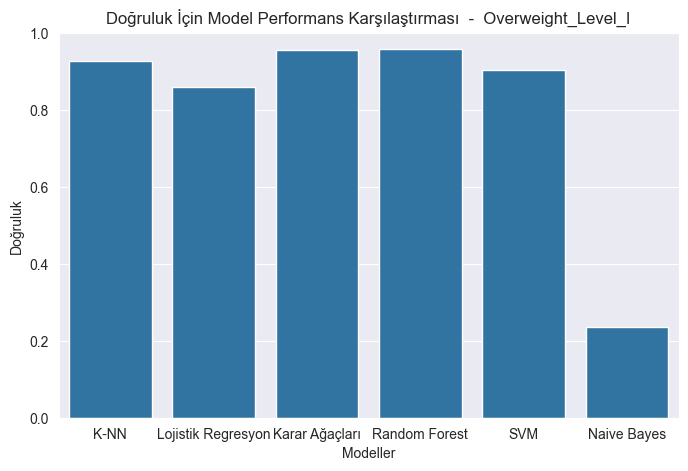

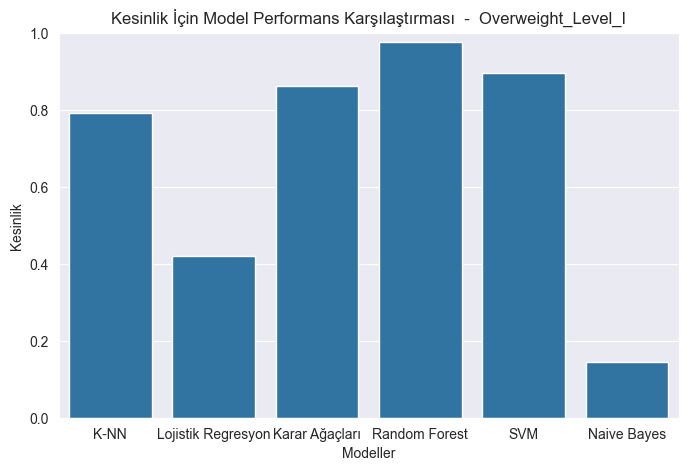

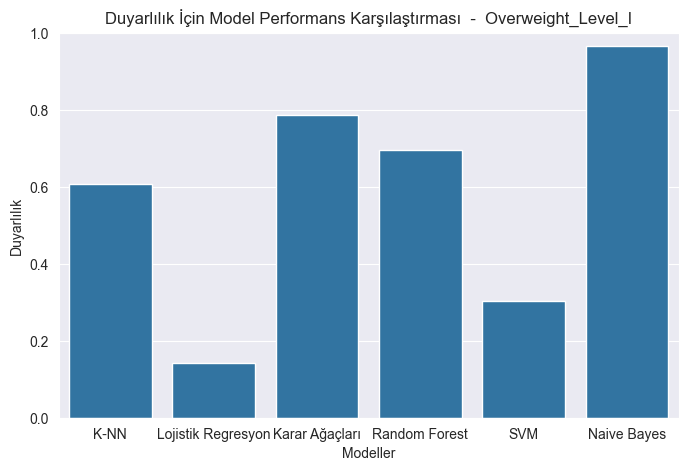

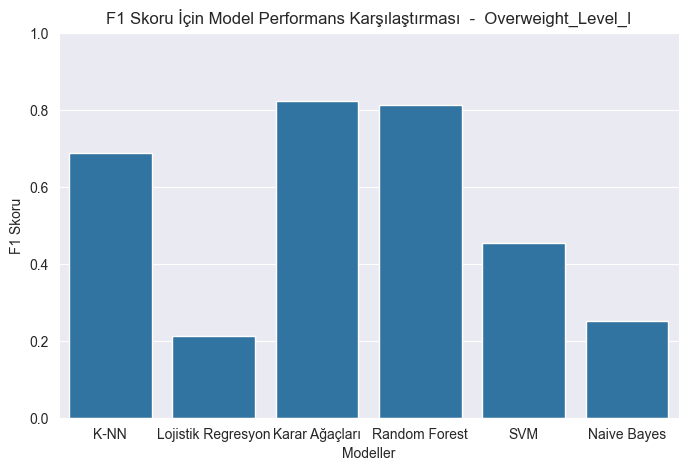

Class: Overweight_Level_II
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.925837  0.765957    0.642857  0.699029
Lojistik Regresyon  0.863636  0.473684    0.160714  0.240000
Karar Ağaçları      0.966507  0.850000    0.910714  0.879310
Random Forest       0.966507  0.956522    0.785714  0.862745
SVM                 0.933014  0.868421    0.589286  0.702128
Naive Bayes         0.260766  0.151515    0.982143  0.262530


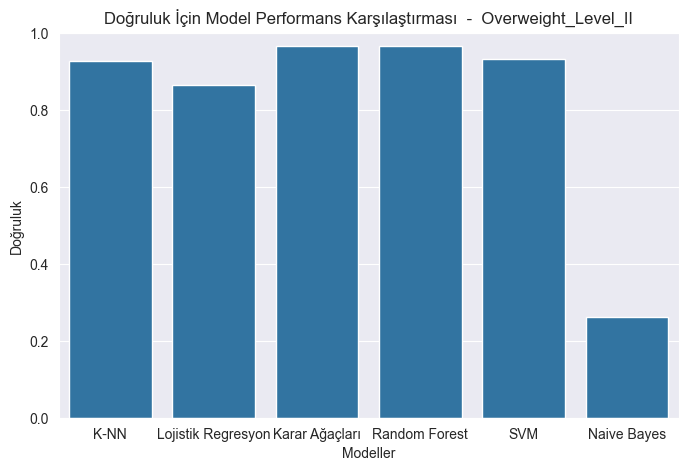

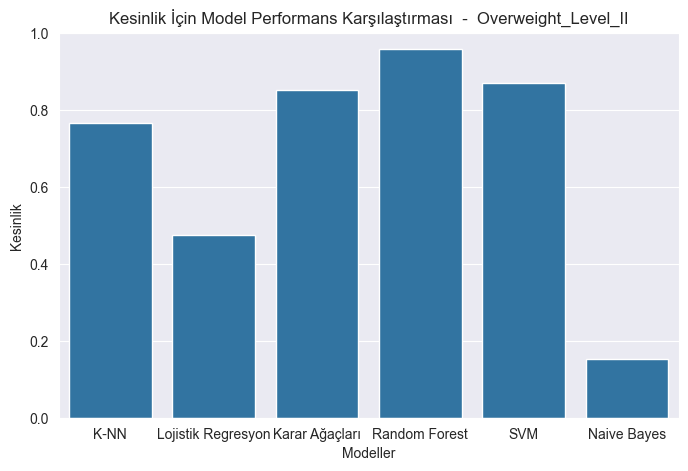

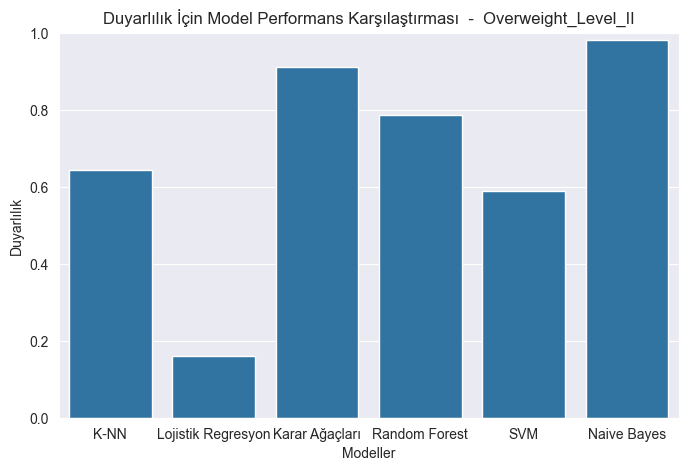

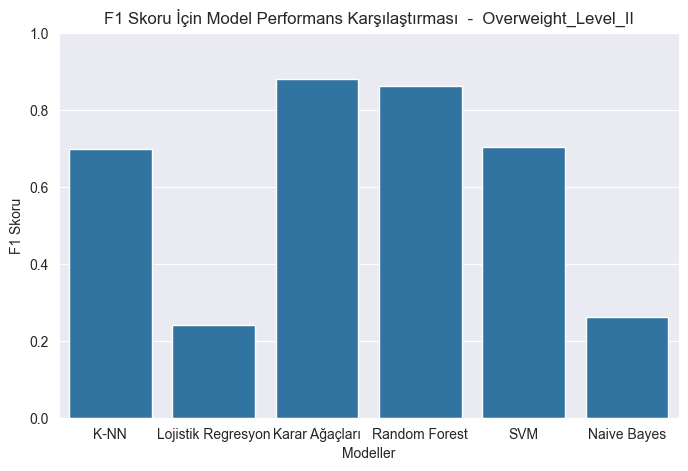

Class: Obesity_Type_I
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.928230  0.806452    0.735294  0.769231
Lojistik Regresyon  0.873206  0.758621    0.323529  0.453608
Karar Ağaçları      0.980861  0.941176    0.941176  0.941176
Random Forest       0.973684  0.983051    0.852941  0.913386
SVM                 0.921053  0.948718    0.544118  0.691589
Naive Bayes         0.406699  0.207792    0.941176  0.340426


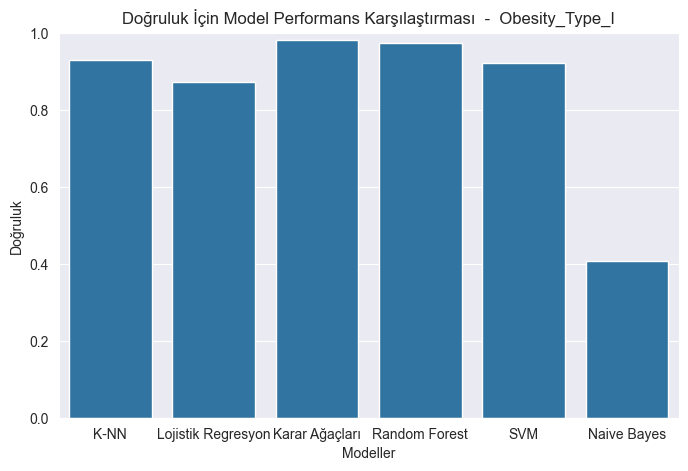

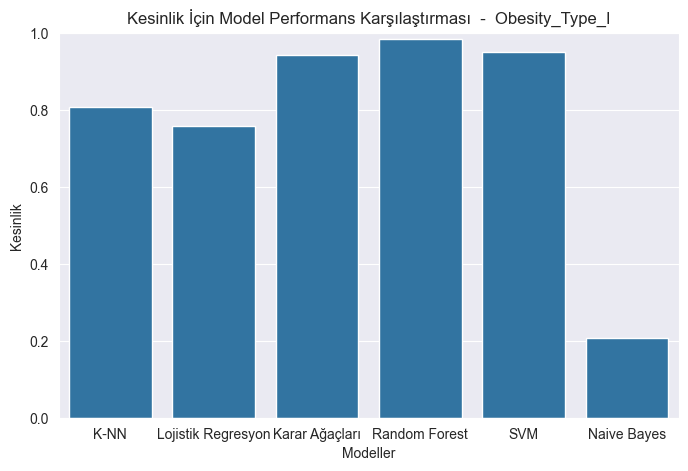

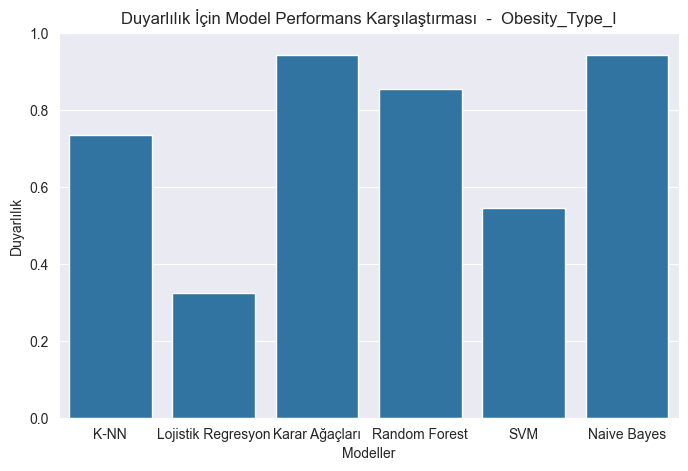

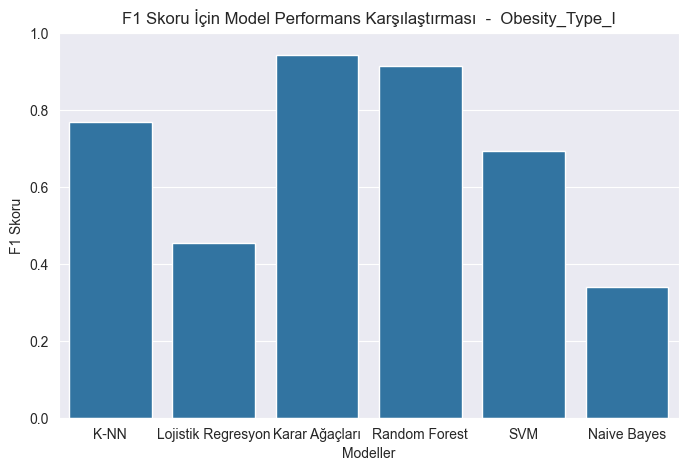

Class: Insufficient_Weight
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.947368  0.814815    0.785714  0.800000
Lojistik Regresyon  0.983254  0.888889    1.000000  0.941176
Karar Ağaçları      0.983254  0.929825    0.946429  0.938053
Random Forest       0.988038  1.000000    0.910714  0.953271
SVM                 0.973684  0.924528    0.875000  0.899083
Naive Bayes         0.633971  0.263415    0.964286  0.413793


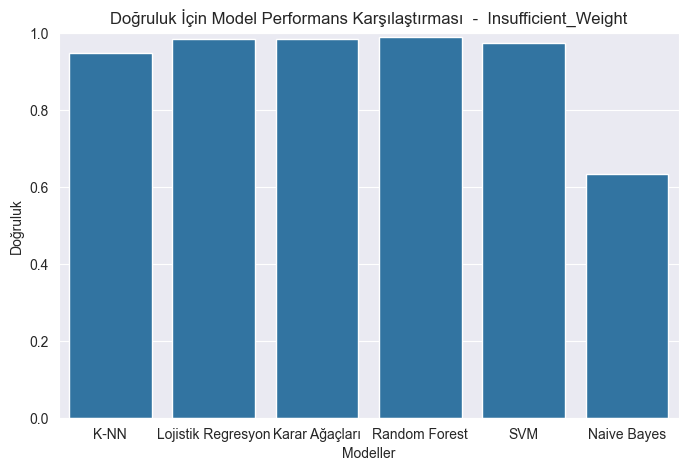

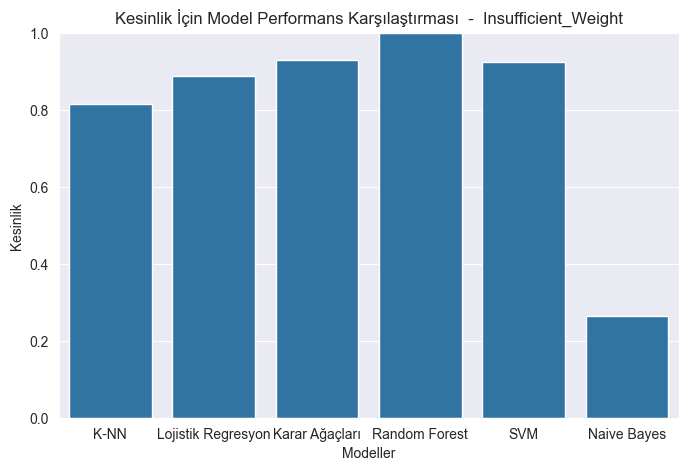

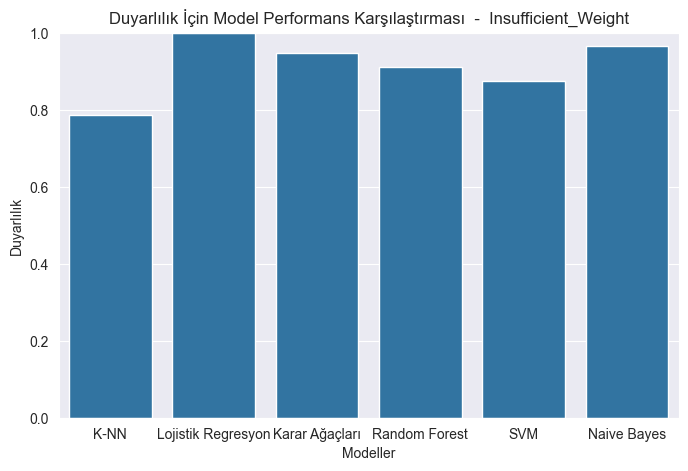

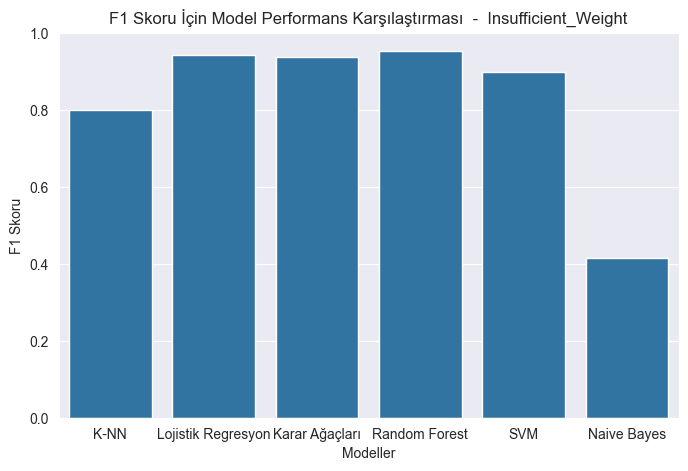

Class: Obesity_Type_II
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.978469  0.906250    0.950820  0.928000
Lojistik Regresyon  0.988038  0.937500    0.983607  0.960000
Karar Ağaçları      0.997608  1.000000    0.983607  0.991736
Random Forest       0.997608  1.000000    0.983607  0.991736
SVM                 0.988038  0.937500    0.983607  0.960000
Naive Bayes         0.777512  0.394737    0.983607  0.563380


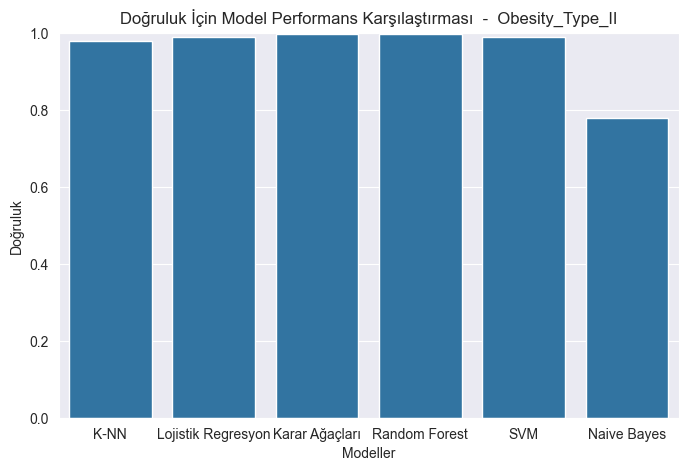

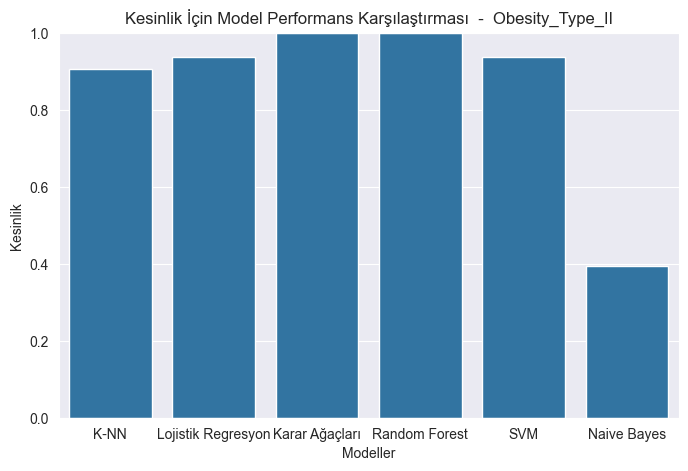

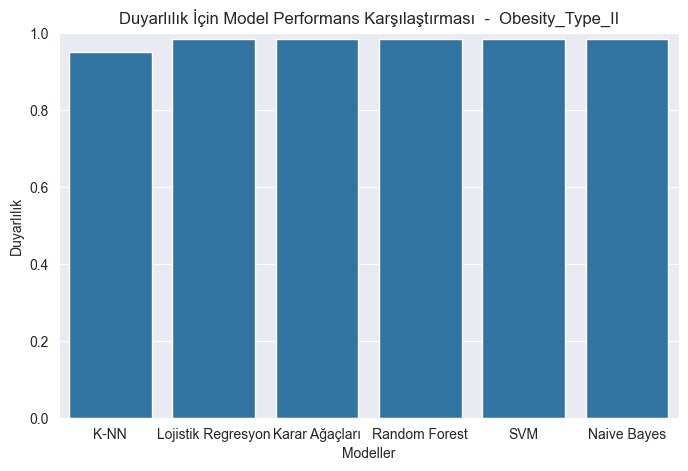

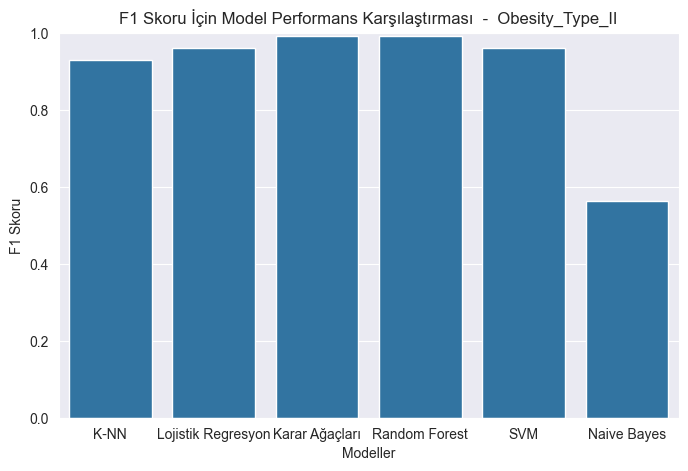

Class: Obesity_Type_III
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.995215  0.970149         1.0  0.984848
Lojistik Regresyon  1.000000  1.000000         1.0  1.000000
Karar Ağaçları      1.000000  1.000000         1.0  1.000000
Random Forest       1.000000  1.000000         1.0  1.000000
SVM                 1.000000  1.000000         1.0  1.000000
Naive Bayes         0.997608  0.984848         1.0  0.992366


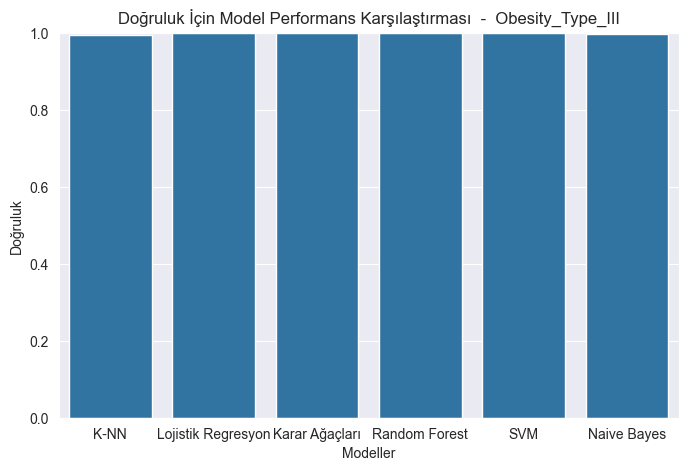

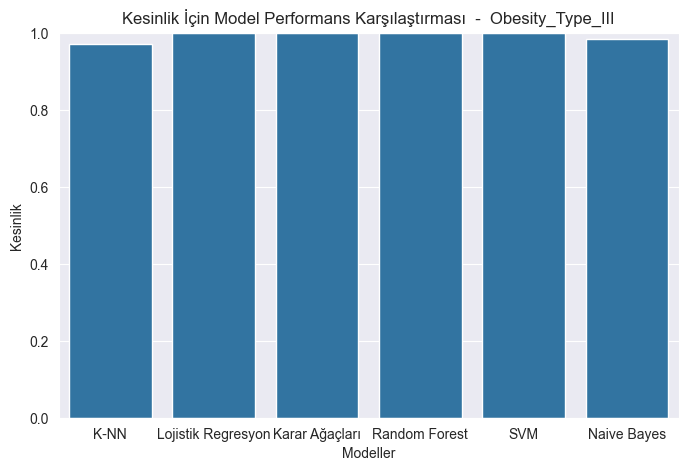

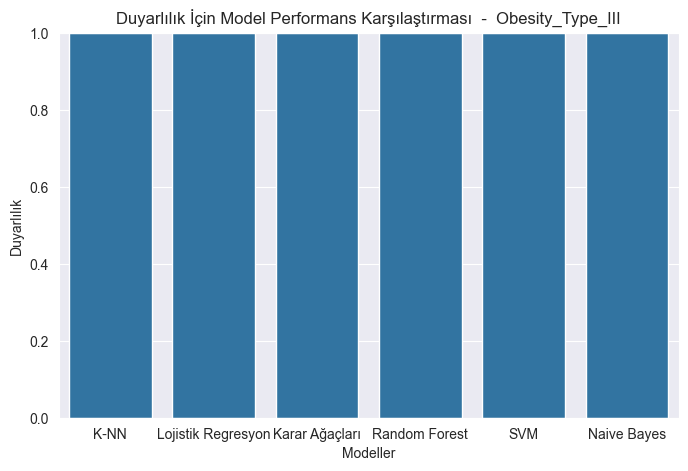

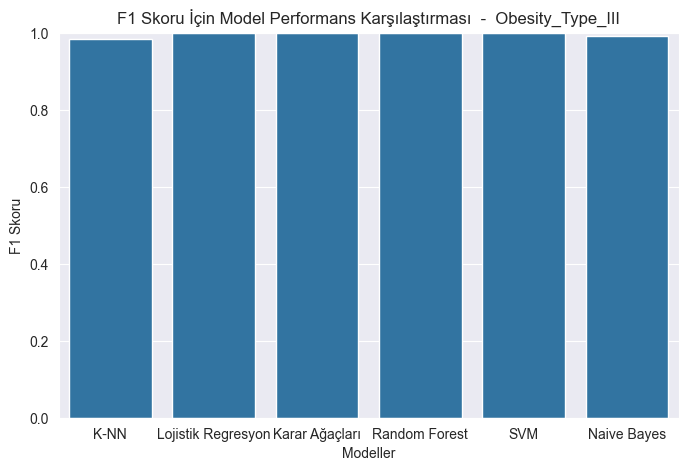

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Verisetinin yüklenmesi
data = pd.read_csv('TemizlenmisData1.csv')

# Verisetinin önişlenmesi
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Kategorik değişkenlerin "dummy" olarak işaretlenmesi
X = pd.get_dummies(X)

# Verisetinin eğitim ve test veriseti olarak ikiye ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özelliklerin standartlaştırılması
olcutleyici = StandardScaler()
X_train = olcutleyici.fit_transform(X_train)
X_test = olcutleyici.transform(X_test)

# Modellerin başlatılması
modeller = {
    'K-NN': KNeighborsClassifier(),
    'Lojistik Regresyon': LogisticRegression(max_iter=1000),
    'Karar Ağaçları': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Bütün modellerin sonuç verisine (NObeyesdad 'obezite seviye') göre eğitilmesi ve değerlendirilmesi
sonuc = {}
gruplar = y.unique()

for grp in gruplar:
    sonuc[grp] = {}
    y_train_cls = (y_train == grp).astype(int)
    y_test_cls = (y_test == grp).astype(int)

    for model_name, model in modeller.items():
        model.fit(X_train, y_train_cls)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test_cls, y_pred)
        precision = precision_score(y_test_cls, y_pred)
        recall = recall_score(y_test_cls, y_pred)
        f1 = f1_score(y_test_cls, y_pred)

        sonuc[grp][model_name] = {
            'Doğruluk': accuracy,
            'Kesinlik': precision,
            'Duyarlılık': recall,
            'F1 Skoru': f1
        }

# Elde edilen sonuçların her model değerlendirme ölçütü için grafiğe dökülmesi
olcutler = ['Doğruluk', 'Kesinlik', 'Duyarlılık', 'F1 Skoru']

for grp in gruplar:
    print(f"Class: {grp}")
    results_df = pd.DataFrame(sonuc[grp]).T
    print(results_df)

    for olct in olcutler:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=results_df.index, y=results_df[olct])
        plt.title(f'{olct} İçin Model Performans Karşılaştırması  -  {grp}')
        plt.xlabel('Modeller')
        plt.ylabel(olct)
        plt.ylim(0, 1)
       # Oluşturulan grafikleri .png olarak kaydetmek için alt satırdaki kare işaretini silin
       # plt.savefig(f'{grp}_{olct}.png')
        plt.show()


